In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, classification_report, mean_absolute_error, mean_squared_error 
from mlxtend.plotting import plot_confusion_matrix

In [72]:
column_names = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat','medv']
df = pd.read_csv("../housing.csv", header=None, delimiter=r"\s+", names=column_names)

In [73]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [74]:
x = df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat']]

In [75]:
x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [76]:
y = df["medv"]

In [77]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [78]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

In [79]:
df = x
df["target"] = y
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


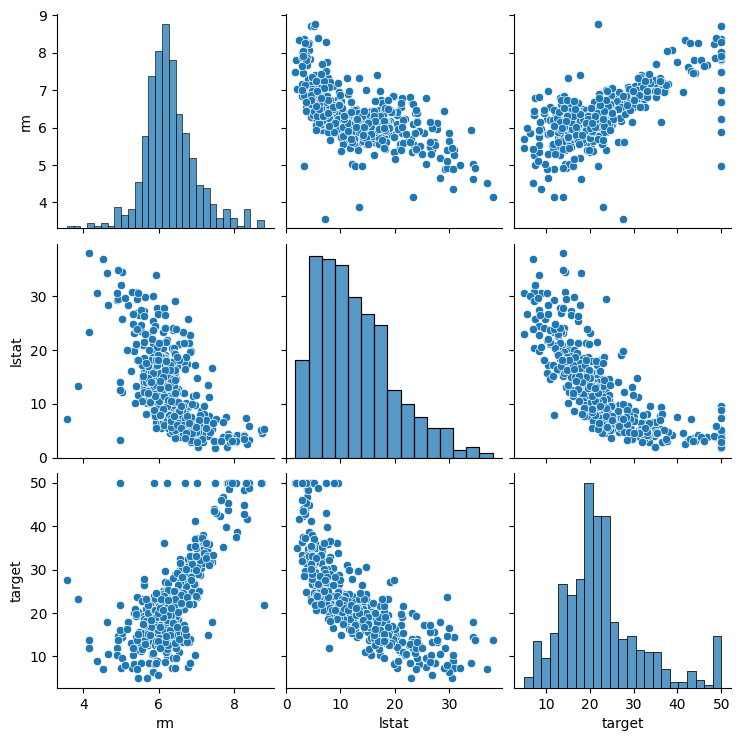

In [80]:
df = df[["rm","lstat","target"]]
sns.pairplot(df)

In [49]:
df["target"] = y

C:\Users\Dell\AppData\Local\Temp\ipykernel_13136\935954519.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["target"] = y


In [35]:
df

,rm,lstat,medv,target
0,6.575,4.98,24.0,24.0
1,6.421,9.14,21.6,21.6
2,7.185,4.03,34.7,34.7
3,6.998,2.94,33.4,33.4
4,7.147,5.33,36.2,36.2
...,...,...,...,...
501,6.593,9.67,22.4,22.4
502,6.120,9.08,20.6,20.6
503,6.976,5.64,23.9,23.9
504,6.794,6.48,22.0,22.0


In [81]:
x = df[["rm","lstat"]]
y = df["target"]

In [82]:
x

,rm,lstat
0,6.575,4.98
1,6.421,9.14
2,7.185,4.03
3,6.998,2.94
4,7.147,5.33
...,...,...
501,6.593,9.67
502,6.120,9.08
503,6.976,5.64
504,6.794,6.48


In [83]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: target, Length: 506, dtype: float64

In [86]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 0.41367189, -1.0755623 ],
       [ 0.19427445, -0.49243937],
       [ 1.28271368, -1.2087274 ],
       ...,
       [ 0.98496002, -0.98304761],
       [ 0.72567214, -0.86530163],
       [-0.36276709, -0.66905833]])

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4,random_state=42)

In [92]:
x_train

array([[ 1.35537127e+00, -8.02223427e-01],
       [-1.67588851e-01, -7.20922633e-01],
       [ 2.11370357e-01, -4.39173328e-01],
       [-2.61616323e-01, -3.98522931e-01],
       [ 2.97805751e+00, -1.30825078e+00],
       [ 9.83535360e-01, -1.13443529e+00],
       [ 1.60611120e+00, -1.03771538e+00],
       [-1.65750309e-02, -8.23249494e-01],
       [-2.31698491e-01, -9.35388521e-01],
       [ 3.42438955e-01,  7.67722947e-01],
       [ 2.81279710e+00, -1.27741255e+00],
       [-7.88740033e-01,  1.34137446e-01],
       [ 1.14452179e+00, -6.73263546e-01],
       [ 2.99699195e-01, -5.58321044e-01],
       [-7.44575614e-01, -3.13016923e-01],
       [ 1.57233328e-01,  8.64783596e-02],
       [-1.33295965e+00,  9.97607952e-01],
       [ 1.99646768e+00, -1.22414651e+00],
       [ 1.75997434e+00, -7.55966078e-01],
       [ 1.52917963e+00, -1.11060575e+00],
       [-2.32594674e+00,  2.19048685e+00],
       [ 2.84027950e-01,  8.44818528e-01],
       [-6.32027579e-01, -1.74244877e-01],
       [ 1.

In [93]:
y_train

304    36.1
83     22.9
248    24.5
165    25.0
163    50.0
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: target, Length: 303, dtype: float64

In [94]:
lr = LinearRegression()

In [95]:
lr.fit(x_train,y_train)

LinearRegression()

In [96]:
y_pred = lr.predict(x_test)

In [98]:
y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
420    16.7
145    13.8
92     22.9
152    15.3
222    27.5
Name: target, Length: 203, dtype: float64

In [99]:
y_pred

array([25.74773936, 31.27608525, 17.30671689, 26.51410823, 19.39301253,
       23.02582944, 16.7891583 , 13.95944681, 22.15129846, 20.14559053,
       17.25661743, 18.08956181, -3.07579565, 22.53788847, 20.41455433,
       26.64741313, 17.14564847,  3.1414519 , 37.09320546, 18.24549291,
       26.61282678, 27.36679719, 12.81588609, 26.16501841, 19.08197405,
       14.5577016 , 23.07372595, 20.47512772, 17.75657431, 19.17560953,
       17.68346174, 27.08784751, 27.01499433, 19.82240279, 15.122566  ,
       17.57659822, 32.99859001, 22.55809623, 20.09362228, 25.97027383,
       12.27224664, 28.91025658, 37.92846713, 18.91337775, 25.9140389 ,
       16.66947569, 15.74081307, 27.38107028, 19.44963587, 29.36965871,
       20.80222895, 31.55177958, 17.62255117, 28.48178535, 34.99319957,
       24.16175529, 19.49156399, 31.91662871, 25.20951131, 15.19743451,
       27.10499338, 32.76186306, 30.11432626, 19.22596403, 29.03109857,
       10.68011392, 20.34322842, 26.82264181, 29.93004977, 16.61

In [108]:
mean_squared_error(y_test,y_pred)

30.114739542589575

In [109]:
mean_absolute_error(y_test,y_pred)

4.005690372289201

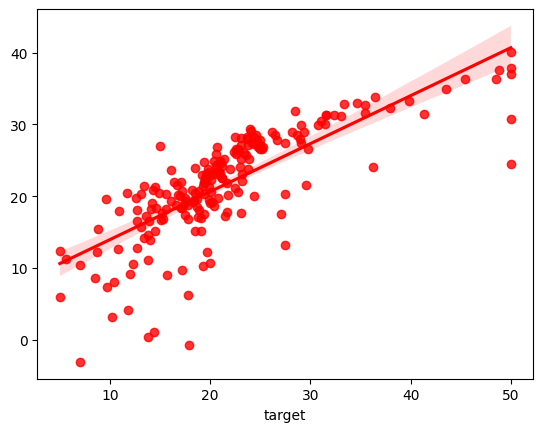

In [105]:
sns.regplot(x=y_test, y=y_pred, color="red")
plt.show()